<a href="https://colab.research.google.com/github/stmarple/MachineLearningWithTensorFlow/blob/master/Presentation_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST (aka Modified National Institute of Standards and Technology Database) 
is a large database of handwritten digits used for training various image processing systems.
https://en.wikipedia.org/wiki/MNIST_database

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf, numpy as np

Before we begin, we should go over a few important **hyperparameters**:
​
1. **epoch**, which is the total training sequences
2. **batch_size**, which is the training batch size
3. display_freq, which is the frequency of results displaying
4. learning_rate, which is the initial optimization learning rate
​

5. **Training data** is the data that our model will be learning from
6. **Test data** is the data that is kept a secret until after the model has been trained, and then evaluated against
7. A **loss function** is used to quantify how accurate our model's predictions are. 
  These are the amount of error involved.  Some typical loss functions are:
  - Mean Squared Error (MSE)
  - Mean Absolute Error (MAE)
  - Mean Bias Error (MBE)
  - **Cross Entropy Loss** / Negative Log Likelihood
  
  Many of these I have seen in my studies in Statistics
8. An **optimization algorithm** controls the weights, that are adjusted during training.


The 2 factors that contribute toe the performance of the neural network are:
* The loss function
* The optimization algorithm

## Calculating Cross Entropy

# [Categorical] Cross Entropy:
## H(p, q) = E<sub>p</sub> [ -log q(x) ] = -$\sum_{i}^C$ p<sub>i</sub>(x) * Log q<sub>i</sub>(x)
Where:
* p is the true probability, given the distribution
* q is the predicted value of the current model
* C is the number of classes, which in our digit classification problem, would be 10
* The above formula is how we find it in many websites.  However, the log is actually base e, not implied base 10, so it should actually be log<sub>e</sub> , or LN. So from now on, in this document, LN is how I'll be writing it; to avoid further confusion.

### _So, let's try to understand this a bit_
 
Say we have an image of digit 2.
Each image can only be entirely one number on a scale of 0 to 9. 

#### Therefore our vector would look like this: 

> p<sub>1</sub> = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

There is 0 probability of being any other number but the one the image is supposed to be.

### Now, let's say we have a machine learning model that classifies the image with probabilities of:

> q<sub>1</sub> = [0.0, 0.0, 0.65, 0.15, 0.0, 0.0, 0.0, 0.20, 0.0, 0.0]

Cross entropy can be calculated on this single image as:

## -$\sum_{i}^C$ p<sub>i</sub>(x) * LN q<sub>i</sub>(x)

= - (0 * LN(0) + 0 * LN(0) + 1 * LN(0.65) + 0 * LN(0.15) + 0 * LN(0) + 0 * LN(0.20) + 0 * LN(0) + 0 * LN(0) + 0 * LN(0) + 0 * LN(0))

= - (LN(0.65))

= 0.43078


In [4]:
def cross_entropy(x, y):
    x = [element if element > 0 else 1 for element in x] # replace prediction probabilities of 0 to prevent LN(0), which is undefined.  Instead replace LN(1) = 0, which cancels out the term anyway
    print(x)
    pred = np.array(x)
    targ = np.array(y)
    
    N = pred.shape[0] # A stack overflow divided by this number, which seems to conflict with my research (see above)
    return -np.sum(targ*np.log(pred))

predictions1 = [0.0, 0.0, 0.65, 0.15, 0.0, 0.20, 0.0, 0.0, 0.0, 0.0]
targets1     = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

cross_entropy(predictions1, targets1)

[1, 1, 0.65, 0.15, 1, 0.2, 1, 1, 1, 1]


0.4307829160924542


### Now, lets say the model was able to get better and classifies the probabilies of this image as:
q<sub>1</sub> = [0.0, 0.0, 0.95, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

So, 

## -$\sum_{i}^C$ p<sub>i</sub>(x) * LN q<sub>i</sub>(x) 

= - (0 * LN(0) + 0 * LN(0) + 1 * LN(0.95) + 0 * LN(0.05) + 0 * LN(0) + 0 * LN(0.20) + 0 * LN(0) + 0 * LN(0) + 0 * LN(0) + 0 * LN(0))

= - (LN(0.95))

= 0.05129

**This is much better!**

In [5]:
predictions2 =  [0.0, 0.0, 0.95, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
targets2     =  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

cross_entropy(predictions2, targets2)

[1, 1, 0.95, 0.05, 1, 1, 1, 1, 1, 1]


0.05129329438755058

## Now that we have learned a bit about the model, let's run it and see what happens!

In [6]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Build the Sequential model

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Creating First Model
Dense layers are "fully connected" layers

* "The sequential model is a linear stack of layers" (https://keras.io/getting-started/sequential-model-guide/)

* The input layer requires the special input_shape parameter which should match the shape of our training data.
* The image_size is a created by flattening an image to 28 X 28 or 28<sup>2</sup>  = 784
* This model has a single hidden layer, that has 32 nodes, or 32 biases using the sigmoid activation function
* And, since there are 784 square units, on 1 layer, that has 32 nodes, there are 784 x 1 x 32 = 25,088 weights, where weights represent the number of pixels
* Therefore, there are 25,088 + 32 biases = 25,120 parameters
* There are 32 x 10, or 320 weights from hidden layer to output layer.
* Each of the 10 nodes adds a single bias >> 25,120 par + 320 weights + 10 nodes = 25,450 total parameters

In [9]:
# Train and evaluate the model

history = model.fit(x_train, y_train, epochs=5)
loss, accuracy  = model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2524 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1147 - acc: 0.9654
Epoch 3/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0816 - acc: 0.9750
Epoch 4/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0655 - acc: 0.9788
Epoch 5/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0517 - acc: 0.9837
10000/10000 - 0s - loss: 0.0637 - acc: 0.9797


**Shape**

From here, we can extrapolate that the training data set has 60,000 samples of images with the dimensions 28 X 28.  We also see that the test sample is composed of 10,000 samples of images of the same dimensions.

In [10]:
print('Training data shape: ', x_train.shape)
print('Test data shape: ', x_test.shape)

Training data shape:  (60000, 28, 28)
Test data shape:  (10000, 28, 28)


**Flatten Images**

The image vector size is the square units of each image.  In this case, 28 * 28, or 784.   
As we saw above, x_train = [60000, 28, 28], so x_train[0] is equal to our sample size, or 60,000.    
As the section says, we are trying to flatten this image.  Rather than being 3 dimensional 60k X 28 X 28,
we are flattening the image population down to area.  So we will be down to (sample size, area) for each: training set and test set.

In [0]:
img_vector_size = 28**2
x_train = x_train.reshape(x_train.shape[0], img_vector_size)
x_test = x_test.reshape(x_test.shape[0], img_vector_size)

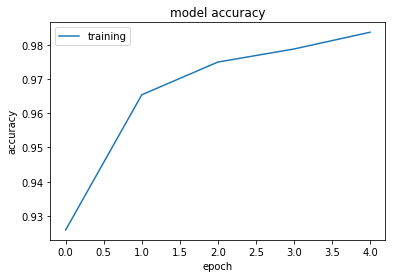

Test loss: 0.0637
Test accuracy: 0.98


In [12]:
# Graph the model accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')


In [0]:
from random import randint,sample

def test_model(img):
  plt.figure
  plt.imshow(x_test[img].reshape(28,28),cmap='Greys')
  pred = model.predict(x_test[img].reshape(1, 28, 28))
  return pred.argmax()

3


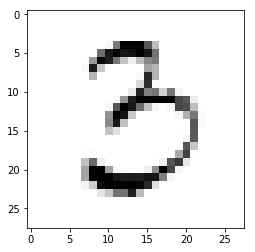

In [22]:
img = randint(100,5000)
plt.imshow(x_test[img].reshape(28,28),cmap='Greys')
pred = model.predict(x_test[img].reshape(1, 28, 28))
print(pred.argmax())